In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [ ]:
df = pd.read_csv("/content/coursera_data.csv", encoding='latin-1')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [ ]:
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('k', '*1000')
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('m', '*1000000')
df['course_students_enrolled'] = df['course_students_enrolled'].map(lambda x: eval(x))

In [ ]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5300.0
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


In [ ]:
df.describe()

,Unnamed: 0,course_rating,course_students_enrolled
count,891.000000,891.000000,8.910000e+02
mean,445.000000,4.677329,9.055208e+04
std,257.353842,0.162225,1.819365e+05
min,0.000000,3.300000,1.500000e+03
25%,222.500000,4.600000,1.750000e+04
50%,445.000000,4.700000,4.200000e+04
75%,667.500000,4.800000,9.950000e+04
max,890.000000,5.000000,3.200000e+06


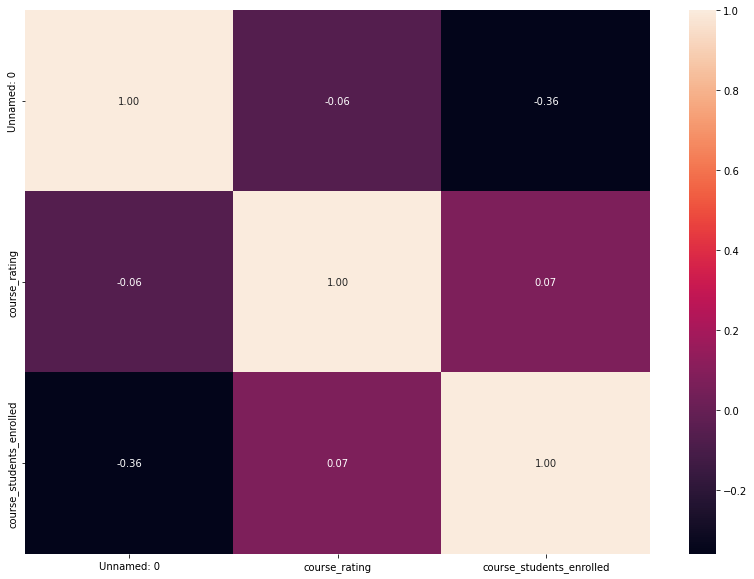

In [ ]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [ ]:
#course available based on difficulty

fig = px.pie(df, names='course_Certificate_type')
fig.show()

In [ ]:
fig2 = px.pie(df, names='course_difficulty')
fig2.show()

In [ ]:
fig3 = px.pie(df, names='course_rating')
fig3.show()

In [ ]:
fig4 = px.scatter(df, x="course_rating", y="course_students_enrolled")
fig4.show()

In [ ]:
fig5 = px.scatter(df, x="course_rating", y="course_students_enrolled", color="course_Certificate_type", hover_data=['course_Certificate_type'], size='course_students_enrolled')
fig5.show()

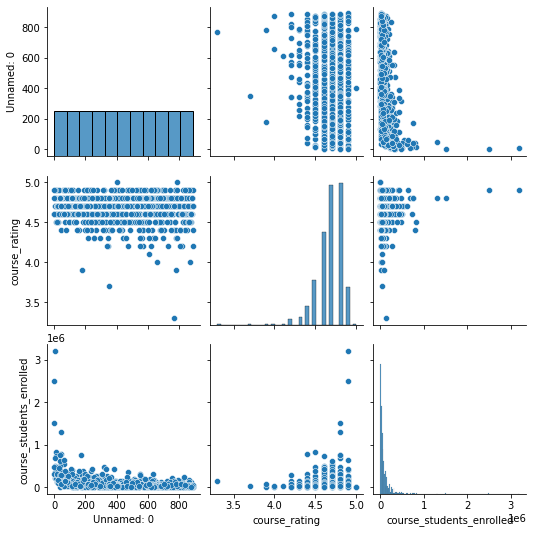

In [ ]:
sns.pairplot(df)

In [ ]:
fig7 = px.bar(df, x='course_rating', color='course_difficulty')
fig7.show()

In [ ]:
total_En_St = df.groupby('course_difficulty').sum().sort_values('course_students_enrolled', ascending=False)
total_En_St = total_En_St.reset_index()
px.bar(x='course_difficulty', y ="course_students_enrolled", data_frame=total_En_St)

In [ ]:
fig = px.histogram(df, x="course_rating", y="course_students_enrolled", marginal="rug", hover_data=df.columns)
fig.show()

In [ ]:
top_univ = df.groupby('course_organization').sum().sort_values('course_students_enrolled', ascending=False).head(15)
top_univ = top_univ.reset_index()
px.bar(x='course_organization', y ="course_students_enrolled", data_frame=top_univ)

In [ ]:
fig8 = px.bar(df, x='course_organization', color='course_difficulty')
fig8.show()

In [ ]:
top_course = df.groupby('course_title').sum().sort_values('course_students_enrolled', ascending=False).head(15)
top_course = top_course.reset_index()
px.bar(x='course_title', y ="course_students_enrolled", data_frame=top_course)

In [ ]:
top_prefrenece = df.groupby('course_rating').sum().sort_values('course_students_enrolled', ascending=False)
top_prefrenece = top_prefrenece.reset_index()
px.bar(x='course_rating', y ="course_students_enrolled", data_frame=top_prefrenece)